# Instrument Performance Comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format

In [2]:
close = pd.read_csv('close.csv', index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


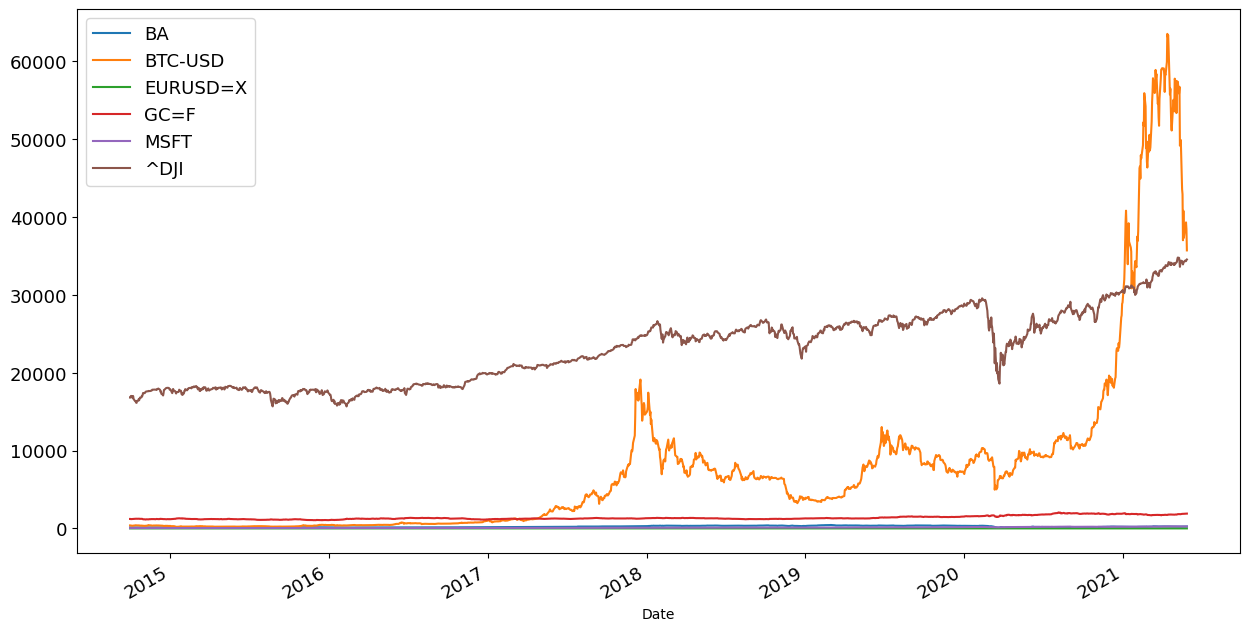

In [3]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [4]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1677 non-null   float64
 1   BTC-USD   2434 non-null   float64
 2   EURUSD=X  1735 non-null   float64
 3   GC=F      1674 non-null   float64
 4   MSFT      1677 non-null   float64
 5   ^DJI      1677 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [5]:
np.log(close / close.shift()).info() # keep NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1312 non-null   float64
 1   BTC-USD   2433 non-null   float64
 2   EURUSD=X  1384 non-null   float64
 3   GC=F      1309 non-null   float64
 4   MSFT      1312 non-null   float64
 5   ^DJI      1312 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [6]:
close.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info() # remove NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   BTC-USD   2433 non-null   float64
 2   EURUSD=X  1734 non-null   float64
 3   GC=F      1673 non-null   float64
 4   MSFT      1676 non-null   float64
 5   ^DJI      1676 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [7]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,-0.0040,-0.0225,-0.0003,-0.0003,-0.0031,-0.0002
2014-10-03,0.0175,-0.0424,0.0037,-0.0183,0.0072,0.0123
2014-10-04,NaN,-0.0891,NaN,NaN,NaN,NaN
2014-10-05,NaN,-0.0257,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,0.0026,0.0230,0.0028,0.0017,-0.0009,0.0003
2021-05-27,0.0379,-0.0221,-0.0046,-0.0029,-0.0087,0.0041
2021-05-28,-0.0148,-0.0739,0.0000,0.0036,0.0015,0.0019


In [8]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   BTC-USD   2433 non-null   float64
 2   EURUSD=X  1734 non-null   float64
 3   GC=F      1673 non-null   float64
 4   MSFT      1676 non-null   float64
 5   ^DJI      1676 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [9]:
returns.describe()

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,1676.0000,2433.0000,1734.0000,1673.0000,1676.0000,1676.0000
mean,0.0004,0.0019,-0.0000,0.0003,0.0010,0.0004
std,0.0263,0.0395,0.0051,0.0094,0.0172,0.0120
min,-0.2724,-0.4647,-0.0281,-0.0511,-0.1595,-0.1384
25%,-0.0092,-0.0123,-0.0031,-0.0042,-0.0062,-0.0034
50%,0.0007,0.0020,-0.0000,0.0003,0.0009,0.0007
75%,0.0105,0.0178,0.0029,0.0051,0.0091,0.0054
max,0.2177,0.2251,0.0281,0.0578,0.1329,0.1076


In [12]:
summary = returns.agg(["mean", "std"]).T
summary

,mean,std
BA,0.0004,0.0263
BTC-USD,0.0019,0.0395
EURUSD=X,-0.0000,0.0051
GC=F,0.0003,0.0094
MSFT,0.0010,0.0172
^DJI,0.0004,0.0120


In [13]:
summary.columns = ["Mean", "Std"]
summary

,Mean,Std
BA,0.0004,0.0263
BTC-USD,0.0019,0.0395
EURUSD=X,-0.0000,0.0051
GC=F,0.0003,0.0094
MSFT,0.0010,0.0172
^DJI,0.0004,0.0120


Text(0.5, 1.0, 'Mean-Variance Analysis')

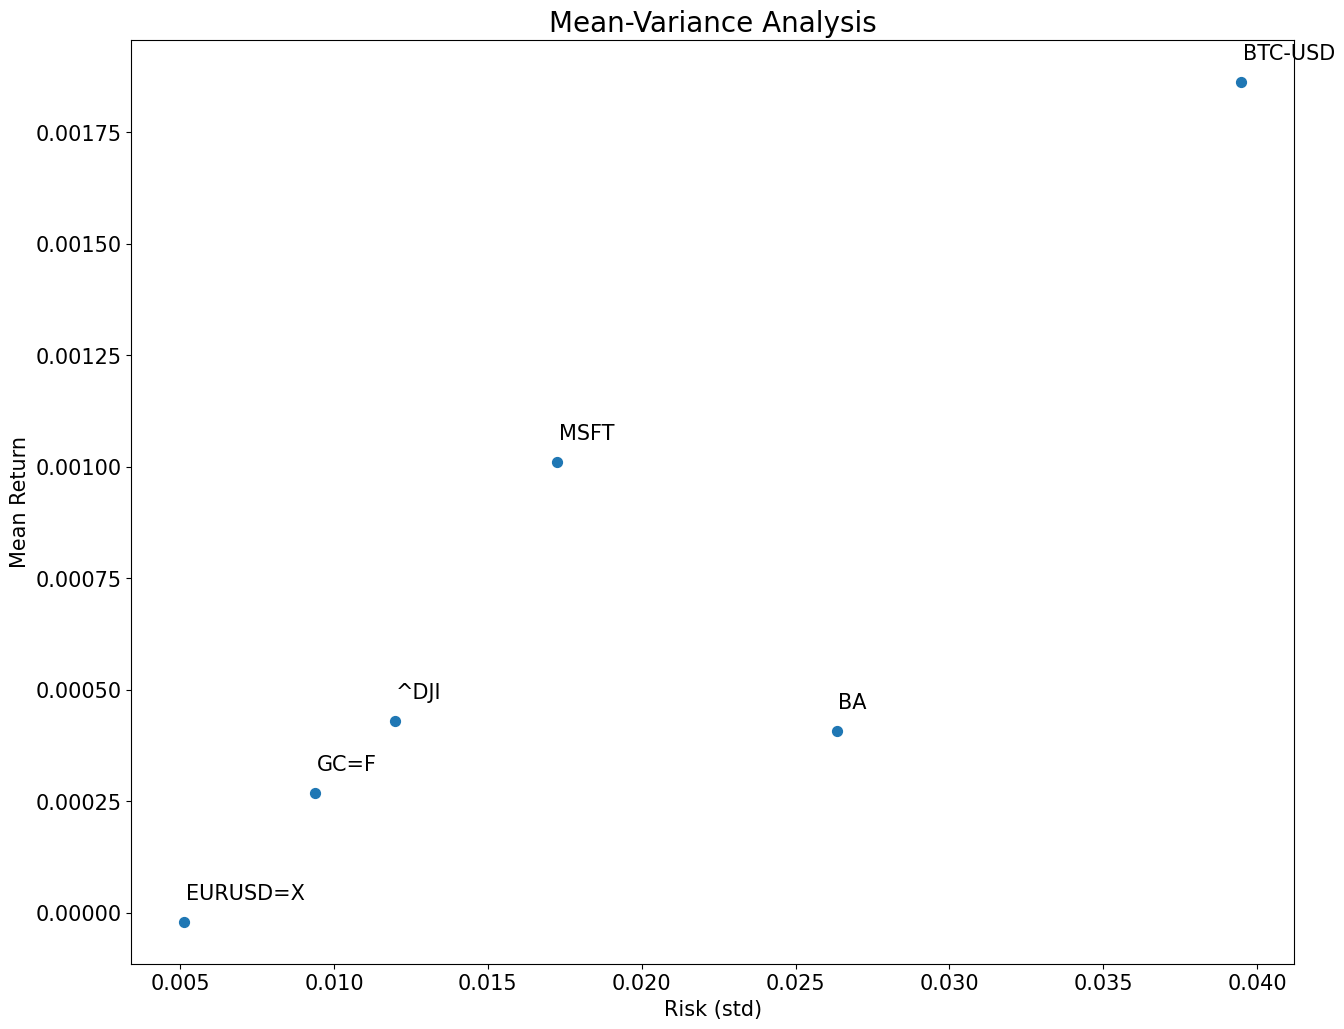

In [19]:
summary.plot(kind = "scatter", x = "Std", y = "Mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy = (summary.loc[i, "Std"] + 0.00005, summary.loc[i, "Mean"] + 0.00005), size = 15)
plt.xlabel("Risk (std)", fontsize = 15)
plt.ylabel("Mean Return", fontsize = 15)
plt.title("Mean-Variance Analysis", fontsize = 20)

**Take Home**: 
- there's no clear best performer without further analysis.
- higher risk means higher returns.
- BA underperformed.

Mean-Variance analysis has one major shortcoming: it assumes that financial returns follow a normal distribution, and that's (typically) not true.

Standard Deviation of Returns underestimates the true/full risk of an investment as it fails to measure "Tail Risks".

## Normality of Financial Returns

In [22]:
msft = pd.read_csv('msft.csv', index_col = 'Date', parse_dates = ['Date'])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [23]:
msft["log_return"] = np.log(msft.Price / msft.Price.shift()) 
msft

,Price,Returns,log_return
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031
2014-10-03,46.0900,0.0072,0.0072
2014-10-06,46.0900,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122
...,...,...,...
2021-05-24,250.7800,0.0229,0.0226
2021-05-25,251.7200,0.0037,0.0037
2021-05-26,251.4900,-0.0009,-0.0009


In [24]:
msft.describe()

,Price,Returns,log_return
count,1677.0000,1676.0000,1676.0000
mean,106.3144,0.0012,0.0010
std,60.7722,0.0173,0.0172
min,40.2900,-0.1474,-0.1595
25%,54.8300,-0.0062,-0.0062
50%,89.7100,0.0009,0.0009
75%,138.9000,0.0091,0.0091
max,261.9700,0.1422,0.1329


Text(0.5, 1.0, 'Frequency Distribution of Returns')

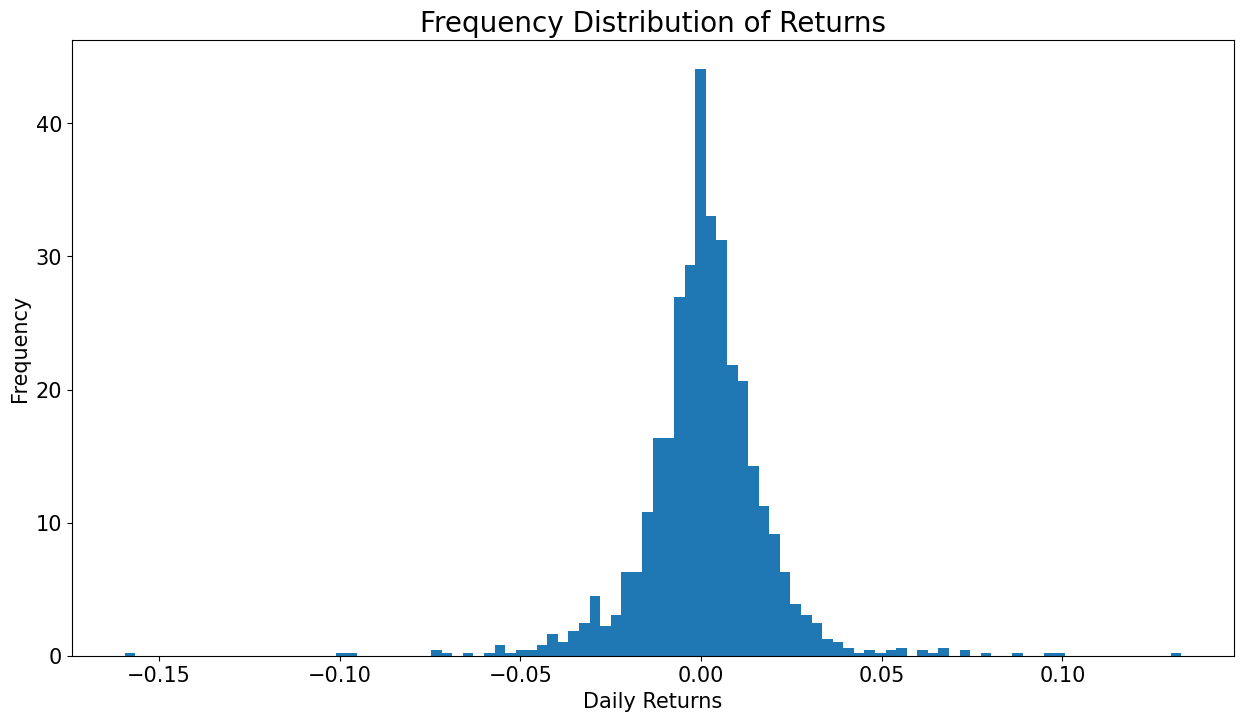

In [28]:
msft.log_return.plot(kind = "hist", bins = 100, figsize = (15, 8), density = True, fontsize = 15)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution of Returns", fontsize = 20)

**Do MSFT Returns follow a normal distribution?**

A normally distributed random variable can fully described by its:
- mean
- standard deviation

Higher Central Moments are zero:
- skew = 0 (measures symmetry around the mean)
- (excess) kurtosis = 0 (positive excess kurtosis = more observations in the "tails")

In [30]:
mu = msft.log_return.mean()
mu

0.0010105697603329652

In [32]:
sigma = msft.log_return.std()
sigma

0.01724882682847896

In [33]:
import scipy.stats as stats

In [35]:
stats.skew(msft.log_return.dropna()) # in a normal distribution: skew = 0

-0.20070528675208313

In [36]:
stats.kurtosis(msft.log_return.dropna(), fisher = True) # in a normal distribution: (fisher) kurtosis == 0

10.733092631202133

**Take home**: MSFT returns exhibit "fat tails" (extreme positive/negative outcomes)

In [39]:
x = np.linspace(msft.log_return.min(), msft.log_return.max(), 10000)
x

array([-0.15945341, -0.15942417, -0.15939493, ...,  0.1328705 ,
        0.13289974,  0.13292898])

In [41]:
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating values for a distribution with mu,sigma
y

array([3.72735695e-18, 3.78660080e-18, 3.84677524e-18, ...,
       4.72250419e-12, 4.66169105e-12, 4.60164778e-12])

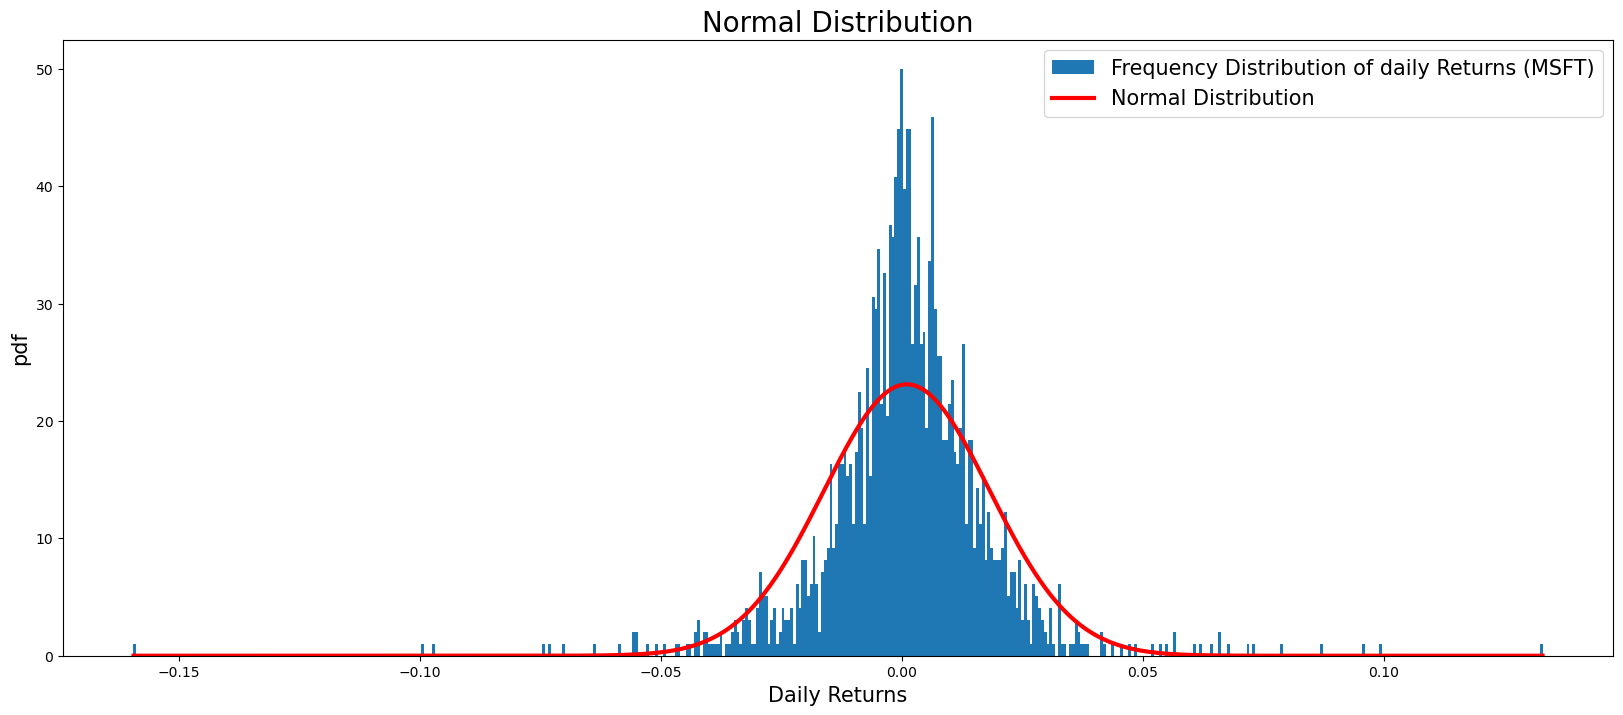

In [44]:
plt.figure(figsize = (20, 8))
plt.hist(msft.log_return, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

**Take home**: MSFT returns exhibit "fat tails" (extreme positive/negative outcomes).

Testing the normality of MSFT Returns based on the sample (Oct 2014 to May 2021):
    
Hypothesis Test with H0 hypothesis: MSFT Returns (full population) follow a normal distribution.

In [45]:
z_stat, p_value = stats.normaltest(msft.log_return.dropna())

In [46]:
z_stat

326.8451656349759

In [47]:
p_value

1.0628551078061005e-71

In [48]:
round(p_value, 10)

0.0

Assuming that MSFT Returns (generally) follow a normal distribution, there is 0% probability that we get those extreme outcomes in a sample.

**Take home**: MSFT Returns don't follow a normal distribution as they exhibit "fat tails". Extreme events/outcomes are not reflected in the Mean-Variance analysis. The standard deviation of returns underestimates true risk.